# Exploring and Preprocessing Data with Pandas and Scikit-Learn

## 1. Iris Dataset

In [1]:
# Load Iris dataset
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Name is a class, not a feature
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])

## 1.1. Summary Statistics

Print the first 5 elements of your DataFrame using the command head(). How many features
are there and what are their types (e.g., numeric, nominal)?

In [2]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- There are 4 features ('Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width')
- All 4 of the features are numeric (cm measurements)

Compute and display summary statistics for each numeric feature available in the dataset.
These must include the minimum value, maximum value, mean, standard deviation, count, and
25:50:75% percentiles.

In [4]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1.2 Data Visualization

Histograms: To illustrate the feature distributions, create a histogram for each numeric feature in the dataset. You may plot each histogram individually or combine them all into a single
plot. When generating histograms for this assignment, use the default number of bins.

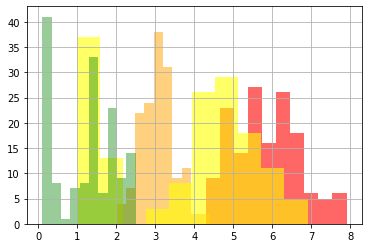

In [38]:
sepal_length = df['Sepal Length']
sepal_length_hist = sepal_length.hist(color='r', alpha=0.6)

sepal_width = df['Sepal Width']
sepal__width_hist = sepal_width.hist(color='orange', alpha=0.5)

petal_length = df['Petal Length']
petal__length_hist = petal_length.hist(color='yellow', alpha=0.6)

petal_width = df['Petal Width']
petal_width_hist = petal_width.hist(color='g', alpha=0.4)

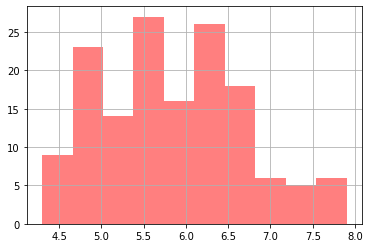

In [37]:
sepal_length = df['Sepal Length']
sepal_length_hist = sepal_length.hist(color='r', alpha=0.5)

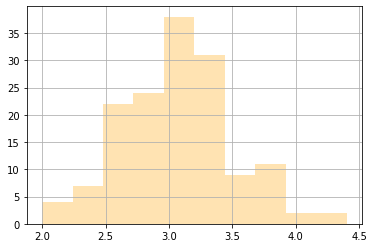

In [17]:
sepal_width = df['Sepal Width']
sepal__width_hist = sepal_width.hist(color='orange', alpha=0.5)

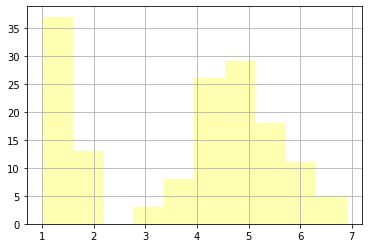

In [19]:
petal_length = df['Petal Length']
petal__length_hist = petal_length.hist(color='yellow', alpha=0.5)

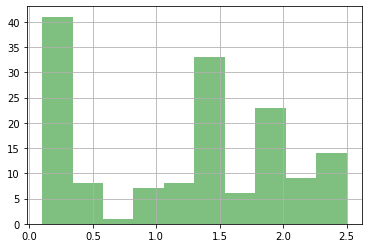

In [34]:
petal_width = df['Petal Width']
petal_width_hist = petal_width.hist(color='g', alpha=0.5)

Box Plots: To further assess the data, create a box plot for each numeric feature in the
dataset. All of the box plots will be combined into a single plot. 

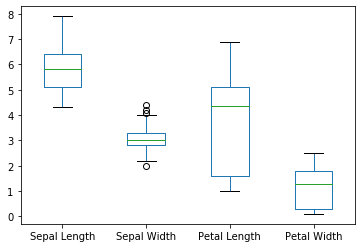

In [39]:
box = df.boxplot(grid=False, return_type='axes')